In [ ]:
Normalized Innovation Squared (NIS)

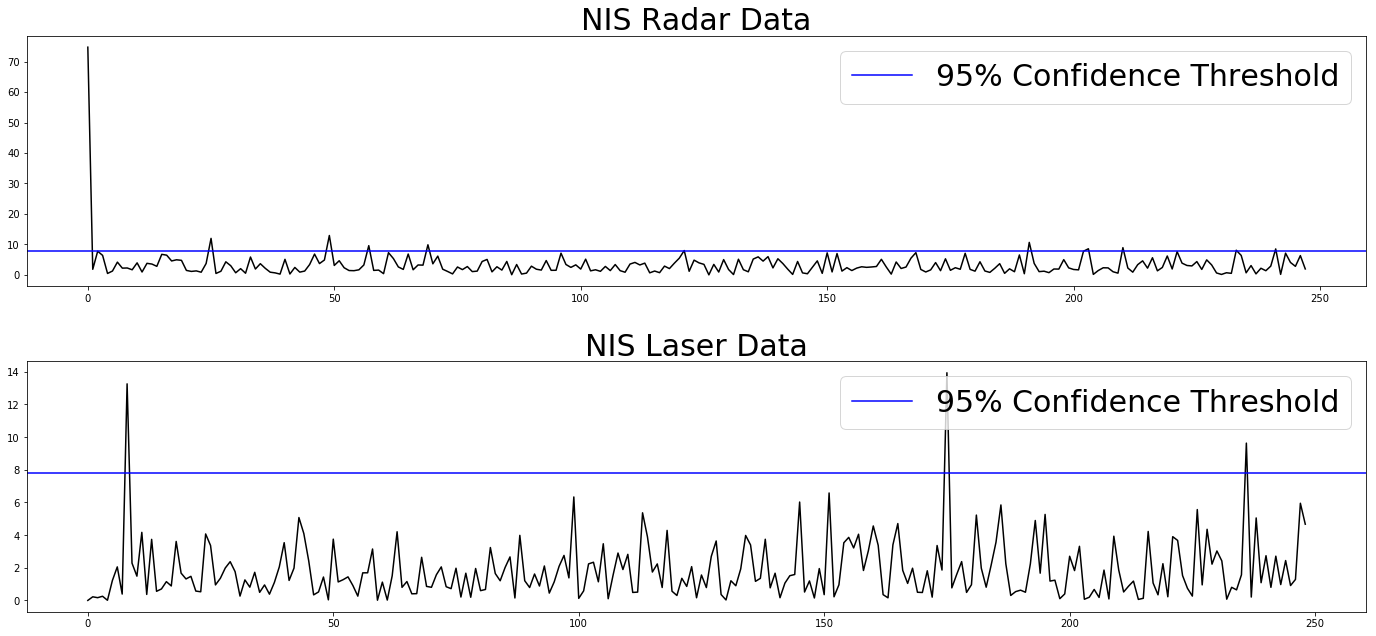

Radar Confidence Level: 95.56
Laser Confidence Level: 97.59


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

nis_radar_file = "./ukf_nis_radar.txt"
nis_laser_file = "./ukf_nis_laser.txt"

radarConfidence = 7.8  # 3 degrees of freedom
laserConfidence = 6.0  # 2 degrees of freedom
save_filename = "./nis_results.jpg"

nis_radar_data = np.loadtxt( nis_radar_file, usecols=[0], skiprows=1 )
nis_laser_data = np.loadtxt( nis_laser_file, usecols=[0], skiprows=1 )


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 10))
f.tight_layout()
#ax1.imshow(image1, cmap=image1cmap)
ax1.set_title("NIS Radar Data", fontsize= 30)
ax1.plot(nis_radar_data, color='black')
ax1.axhline(y=radarConfidence, color="blue", label="95% Confidence Threshold")
ax1.legend( prop={'size':30} )
#ax2.imshow(image2, cmap=image2cmap)
ax2.set_title("NIS Laser Data", fontsize= 30)
ax2.plot(nis_laser_data, color='black')    
ax2.axhline(y=radarConfidence, color="blue", label="95% Confidence Threshold")
ax2.legend( prop={'size':30} )
#plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0. wspace=0.2)
plt.subplots_adjust(left=0.125, right=0.9, top=0.9, bottom=0.1, wspace=0.2, hspace=0.3)
plt.savefig(save_filename)
plt.show()



radar_above = 0
for i in range(len(nis_radar_data)):
    if (nis_radar_data[i] > radarConfidence):
        radar_above += 1

radarPercentConfidenceLevel =   (1.00 - (radar_above / len(nis_radar_data))) * 100
print ("Radar Confidence Level: %5.2f" %(radarPercentConfidenceLevel))
    
laser_above = 0
for i in range(len(nis_laser_data)):
    if (nis_laser_data[i] > laserConfidence):
        laser_above += 1

laserPercentConfidenceLevel =   (1.00 - (laser_above / len(nis_laser_data))) * 100
print ("Laser Confidence Level: %5.2f" %(laserPercentConfidenceLevel))

